# Project

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'D:/OneDrive - University of Warwick/Dissertation/review-Alaska_10.json'

data_raw = pd.read_json(path, lines=True, encoding='utf-8')

c:\Python38\lib\site-packages\pandas\core\dtypes\cast.py:995: RuntimeWarning: invalid value encountered in cast
  return arr.astype(dtype, copy=True)


This indicates the presence of NA values in the data. However, as this is one of the aspects we intend to investigate, we will selectively perform data cleaning at a later stage.

In [3]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521515 entries, 0 to 521514
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  521515 non-null  float64
 1   name     521515 non-null  object 
 2   time     521515 non-null  int64  
 3   rating   521515 non-null  int64  
 4   text     298257 non-null  object 
 5   pics     20851 non-null   object 
 6   resp     44232 non-null   object 
 7   gmap_id  521515 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.8+ MB
None


In [4]:
print(data_raw.head())

        user_id               name           time  rating  \
0  1.091298e+20         Nicki Gore  1566331951619       5   
1  1.132409e+20      Allen Ratliff  1504917982385       5   
2  1.130448e+20  Jonathan Tringali  1474765901185       4   
3  1.103292e+20             S Blad  1472858535682       4   
4  1.089896e+20     Daniel Formoso  1529649811341       5   

                                                text  pics  resp  \
0  We always stay here when in Valdez for silver ...  None  None   
1  Great campground for the price. Nice hot unlim...  None  None   
2  We tent camped here for 2 nights while explori...  None  None   
3  This place is just a few miles outside Valdez,...  None  None   
4  Probably the nicest and cleanest campground we...  None  None   

                                 gmap_id  
0  0x56b646ed2220b77f:0xd8975e316de80952  
1  0x56b646ed2220b77f:0xd8975e316de80952  
2  0x56b646ed2220b77f:0xd8975e316de80952  
3  0x56b646ed2220b77f:0xd8975e316de80952  
4  0x56b6

## Data Dictionary

- index: The index of the data.
- user_id: The ID of the reviewer.
- name: The name of the reviewer.
- time: The time of the review in Unix time format.
- rating: The rating given by the reviewer for the business.
- text: The text of the review.
- pics: Pictures associated with the review.
- resp: The business response to the review, including Unix time and the text of the response.
- gmap_id: The ID of the business.

Due to the nature of our research topic, which is to explore the influence of time of day on online ratings across different devices, we will be selecting specific data variables for further analysis. The data variables of interest include "time," "rating," and "pics." The reason for selecting "pics" is due to the unfortunate inability to obtain data directly related to device types in the comments. Therefore, we need to make a crucial assumption: 
**we assume that comments with pictures are uploaded using mobile devices, while comments without pictures are uploaded using non-mobile devices.**

## Data Preprocessing



In this section, we will perform data preprocessing, which includes data cleaning and data transformation. Data cleaning involves handling missing values, outliers, and inconsistencies in the dataset. Data transformation may involve converting the "pics" data into device type data, etc. These steps allow us to make use of the available information and derive meaningful insights from the dataset. 

In [18]:
data_modified = (
    data_raw
    .assign(time=lambda x: pd.to_datetime(x['time'], unit='ms').dt.hour)
    .assign(time=lambda x: pd.cut(x['time'], bins=[0, 8, 16, 24], labels=['Morning', 'Noon', 'Evening'], right=False))
    .assign(time=lambda x: pd.Categorical(x['time']))
    .assign(pics=lambda x: pd.Categorical(x['pics'].notnull().astype(int)))
    .filter(['time', 'rating', 'pics'])
)

print(data_modified[:10])


      time  rating pics
0  Evening       5    0
1  Morning       5    0
2  Morning       4    0
3  Evening       4    0
4  Morning       5    0
5     Noon       5    0
6  Morning       5    1
7  Morning       4    0
8  Morning       2    0
9  Evening       3    0


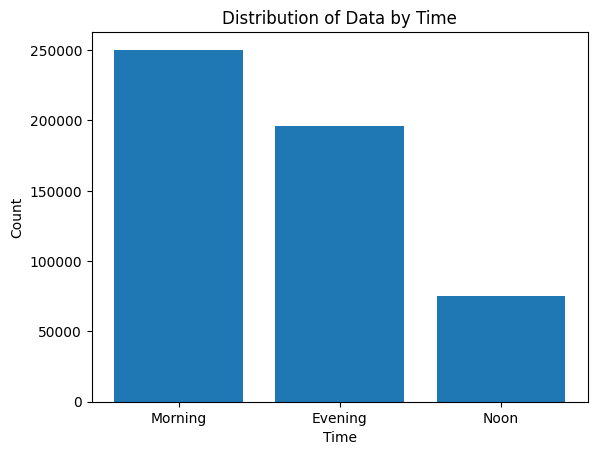

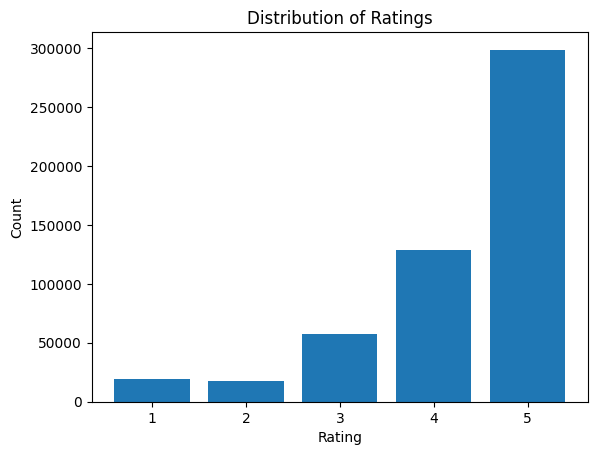

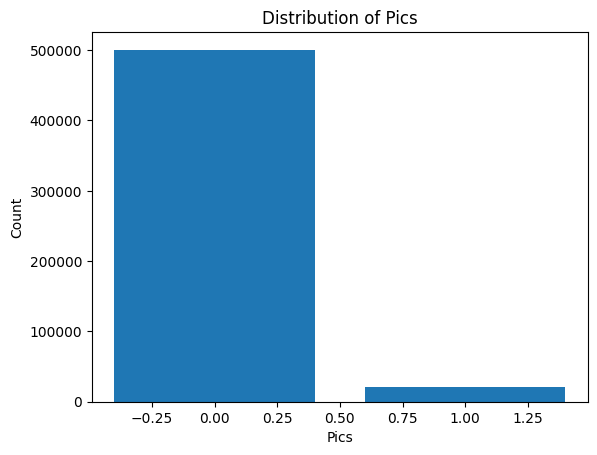

In [21]:
# Count of data by time
time_counts = data_modified['time'].value_counts()

# Histogram for data distribution by time
plt.bar(time_counts.index, time_counts.values)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Data by Time')
plt.show()

# Count of data by rating
rating_counts = data_modified['rating'].value_counts()

# Bar chart for rating distribution
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Count of data by pics
pics_counts = data_modified['pics'].value_counts()

# Bar chart for pics distribution
plt.bar(pics_counts.index, pics_counts.values)
plt.xlabel('Pics')
plt.ylabel('Count')
plt.title('Distribution of Pics')
plt.show()


In [22]:
print(data_modified.isnull().sum())

time      0
rating    0
pics      0
dtype: int64
